In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [2]:
def Jacobi(A,b,x0,maxit,tol, xTrue):
  n=np.size(x0)     
  ite=0
  x = np.copy(x0)
  norma_it=1+tol
  relErr=np.zeros((maxit, 1))
  errIter=np.zeros((maxit, 1))
  relErr[0]=np.linalg.norm(xTrue-x0)/np.linalg.norm(xTrue)
  while (ite<maxit and norma_it>tol):
    x_old=np.copy(x)
    for i in range(0,n):
      x[i]=(b[i]-np.dot(A[i,0:i],x_old[0:i])-np.dot(A[i,i+1:n],x_old[i+1:n]))/A[i,i] #ricorsione x(k+1)=b(i)-a(ij)*x(j)/a(ii)
    ite=ite+1
    norma_it = np.linalg.norm(x_old-x)/np.linalg.norm(x_old)
    relErr[ite] = np.linalg.norm(xTrue-x)/np.linalg.norm(xTrue)
    errIter[ite-1] = norma_it
  relErr=relErr[:ite]
  errIter=errIter[:ite]  
  return [x, ite, relErr, errIter]




def GaussSeidel(A,b,x0,maxit,tol, xTrue):
  n=np.size(x0)     
  ite=0
  x = np.copy(x0)
  relErr=np.zeros((maxit, 1))
  errIter=np.zeros((maxit, 1))
  errIter[0]=tol+1
  relErr[0]=np.linalg.norm(xTrue-x0)/np.linalg.norm(xTrue)
  while ( ite < maxit and errIter[ite] > tol ):   
    x_old=np.copy(x)
    for i in range(0,n):
      x[i]=(b[i]-np.dot(A[i,0:i],x[0:i])-np.dot(A[i,i+1:n],x_old[i+1:n]))/A[i,i] 
    ite=ite+1
    relErr[ite] = np.linalg.norm(xTrue-x)/np.linalg.norm(xTrue)
    errIter[ite] = np.linalg.norm(x-x_old)/np.linalg.norm(x)  #fine ciclo
  relErr=relErr[:ite]
  errIter=errIter[:ite] 
  return [x, ite, relErr, errIter]

In [10]:
n = 10
A = 9*np.eye(n) + np.diag(-4*np.ones(n-1),  1) + np.diag(-4*np.ones(n-1),  -1)

xTrue = np.ones( (n,1) )
b = np.matmul (A, xTrue) 

print('\n A:\n',A)
print('\n xTrue:\n',xTrue)
print('\n b:\n',b)

x0 = np.zeros( (n,1) )
maxit = 100
tol = 1.e-6
(xJacobi, kJacobi, relErrJacobi, errIterJacobi) = Jacobi(A,b,x0,maxit,tol,xTrue) 
(xGS, kGS, relErrGS, errIterGS) = GaussSeidel(A,b,x0,maxit,tol,xTrue) 

print('\nSoluzione calcolata da Jacobi:' )
for i in range(n):
    print('%0.2f' %xJacobi[i])
print('iterazioni: ',kJacobi)


print('\nSoluzione calcolata da Gauss Seidel:' )
for i in range(n):
    print('%0.2f' %xGS[i])
print('iterazioni: ',kGS)



 A:
 [[ 9. -4.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-4.  9. -4.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -4.  9. -4.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -4.  9. -4.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -4.  9. -4.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -4.  9. -4.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -4.  9. -4.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -4.  9. -4.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -4.  9. -4.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -4.  9.]]

 xTrue:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

 b:
 [[5.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [5.]]

Soluzione calcolata da Jacobi:
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
iterazioni:  76

Soluzione calcolata da Gauss Seidel:
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
1.00
iterazioni:  42


C:\Users\sharo\AppData\Local\Temp\ipykernel_25540\271688564.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  norma_it = np.linalg.norm(x_old-x)/np.linalg.norm(x_old)


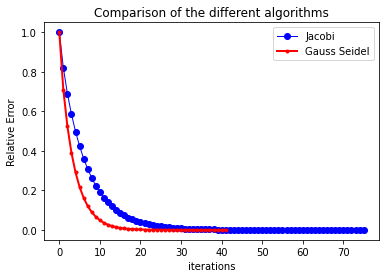

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

rangeJabobi = range (0, kJacobi)
rangeGS = range(0, kGS)

ax.plot(rangeJabobi, relErrJacobi, label='Jacobi', color='blue', linewidth=1, marker='o'  )
ax.plot(rangeGS, relErrGS, label='Gauss Seidel', color = 'red', linewidth=2, marker='.' )
legend = ax.legend(loc='upper right')
plt.xlabel('iterations')
plt.ylabel('Relative Error')
plt.title('Comparison of the different algorithms')
plt.show()